# Reviewing Employee Satisfaction
Employment is a relationship between two parties, usually based on contract where work is paid for, where one party, which may be a corporation, for profit, not-for-profit organization, co-operative or other entity is the employer and the other is the employee.







## Problems
Company performance is determined based on employee performance. If most of the employees have poor performance, it can be said that the company's performance is also not good. Therefore, the quality of employees needs to be considered. One indicator of seeing the quality of employees is by knowing employee satisfaction while working at the company.
1. What are the factors that make employees feel satisfied?
2. Can employee satisfaction be predicted using Machine Learning to measure employee performance so that it can measure company performance as well?

## Goals
1. Knowing what factors affect employee satisfaction.
2. Predicting employee satisfaction using Machine Learning.

# 1) Preparation of Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install sidetable
import sidetable

import warnings
warnings.filterwarnings('ignore')

In [2]:
satis = pd.read_csv('satisfaction.csv',index_col = 0)

In [3]:
satis.head()

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


In [4]:
satis.isnull().sum()

emp_id              0
age                 0
Dept                0
location            0
education           0
recruitment_type    0
job_level           0
rating              0
onsite              0
awards              0
certifications      0
salary              0
satisfied           0
dtype: int64

#2) Explaination of Each Column

In [5]:
col_detail = ["unique ID",
              "age",
              "department",
              "employee's location",
              "employee's education status",
              "mode of recruitment",
              "1 to 5. The job level of the employee. 1 being the least and 5 being the hightest position",
              "1 to 5. The previous year rating of the employee. 1 begin the least and 5 being the highest position",
              "Has the employee ever went to an onsite location? 0 means no, 1 means yes",
              "Number of awards",
              "Is the employee certified?",
              "Net salary",
              "Is the employee satisfied with his job?"]

descr = []
j = 0
for name in satis.columns:
  descr.append(
      [
       name,
       satis[name].dtypes,
       satis[name].isnull().sum(),
       round(satis[name].isnull().sum()/len(satis)*100, 2),
       satis[name].nunique(),
       satis[name].unique(),
       col_detail[j]
       ]
       )
  j += 1

column_desc = pd.DataFrame(descr, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique','Description'])
print(f"Total column of this data set is: {len(satis.columns)} columns.")

Total column of this data set is: 13 columns.


In [6]:
column_desc
# there are no nulls, so we move ahead to Outliers check.

,Column,Dtype,Null,Null (%),nUnique,Unique,Description
0,emp_id,object,0,0.0,499,"[HR8270, TECH1860, TECH6390, SAL6191, HR6734, ...",unique ID
1,age,int64,0,0.0,32,"[28, 50, 43, 44, 33, 40, 26, 25, 35, 45, 31, 4...",age
2,Dept,object,0,0.0,5,"[HR, Technology, Sales, Purchasing, Marketing]",department
3,location,object,0,0.0,2,"[Suburb, City]",employee's location
4,education,object,0,0.0,2,"[PG, UG]",employee's education status
5,recruitment_type,object,0,0.0,4,"[Referral, Walk-in, On-Campus, Recruitment Age...",mode of recruitment
6,job_level,int64,0,0.0,5,"[5, 3, 4, 2, 1]",1 to 5. The job level of the employee. 1 being...
7,rating,int64,0,0.0,5,"[2, 5, 1, 3, 4]",1 to 5. The previous year rating of the employ...
8,onsite,int64,0,0.0,2,"[0, 1]",Has the employee ever went to an onsite locati...
9,awards,int64,0,0.0,10,"[1, 2, 0, 5, 7, 4, 9, 6, 8, 3]",Number of awards


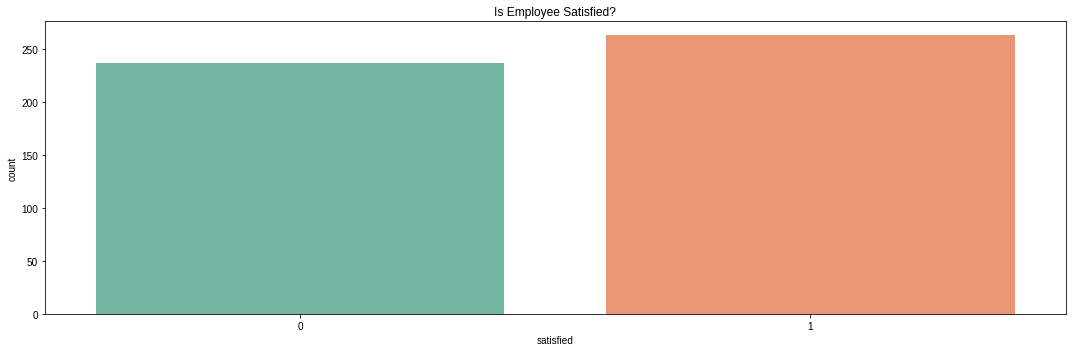

In [7]:
plt.figure(figsize = (15,5))

sns.countplot(satis['satisfied'], palette = 'Set2')
plt.title("Is Employee Satisfied?")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# 52.6% employees are satisfied and the rest 47.4% are not.

In [8]:
satis.stb.freq(['satisfied'], cum_cols = False)

,satisfied,count,percent
0,1,263,52.6
1,0,237,47.4


# 3) Handling Missing Value

# 4) Datetime Dtype

In [9]:
satis.head()

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


#5) Outliers

In [10]:
satis.describe().T

# The average of each column is:
    # age : 38 years old
    # job_level = 3 of 5
    # rating = 3 of 5
    # onsite = tend to not going to on site
    # awards = about 4-5 awards received
    # certifications = tend to not certified
    # salary = $50,416
    # satisfied = tend to satisfied

,count,mean,std,min,25%,50%,75%,max
age,500.0,38.610,9.438648,23.0,30.0,39.0,47.0,54.0
job_level,500.0,3.032,1.423738,1.0,2.0,3.0,4.0,5.0
rating,500.0,3.072,1.425089,1.0,2.0,3.0,4.0,5.0
onsite,500.0,0.466,0.499342,0.0,0.0,0.0,1.0,1.0
awards,500.0,4.538,2.853215,0.0,2.0,5.0,7.0,9.0
certifications,500.0,0.496,0.500485,0.0,0.0,0.0,1.0,1.0
salary,500.0,50416.056,23671.392661,24076.0,29805.0,42419.0,65715.0,86750.0
satisfied,500.0,0.526,0.499824,0.0,0.0,1.0,1.0,1.0


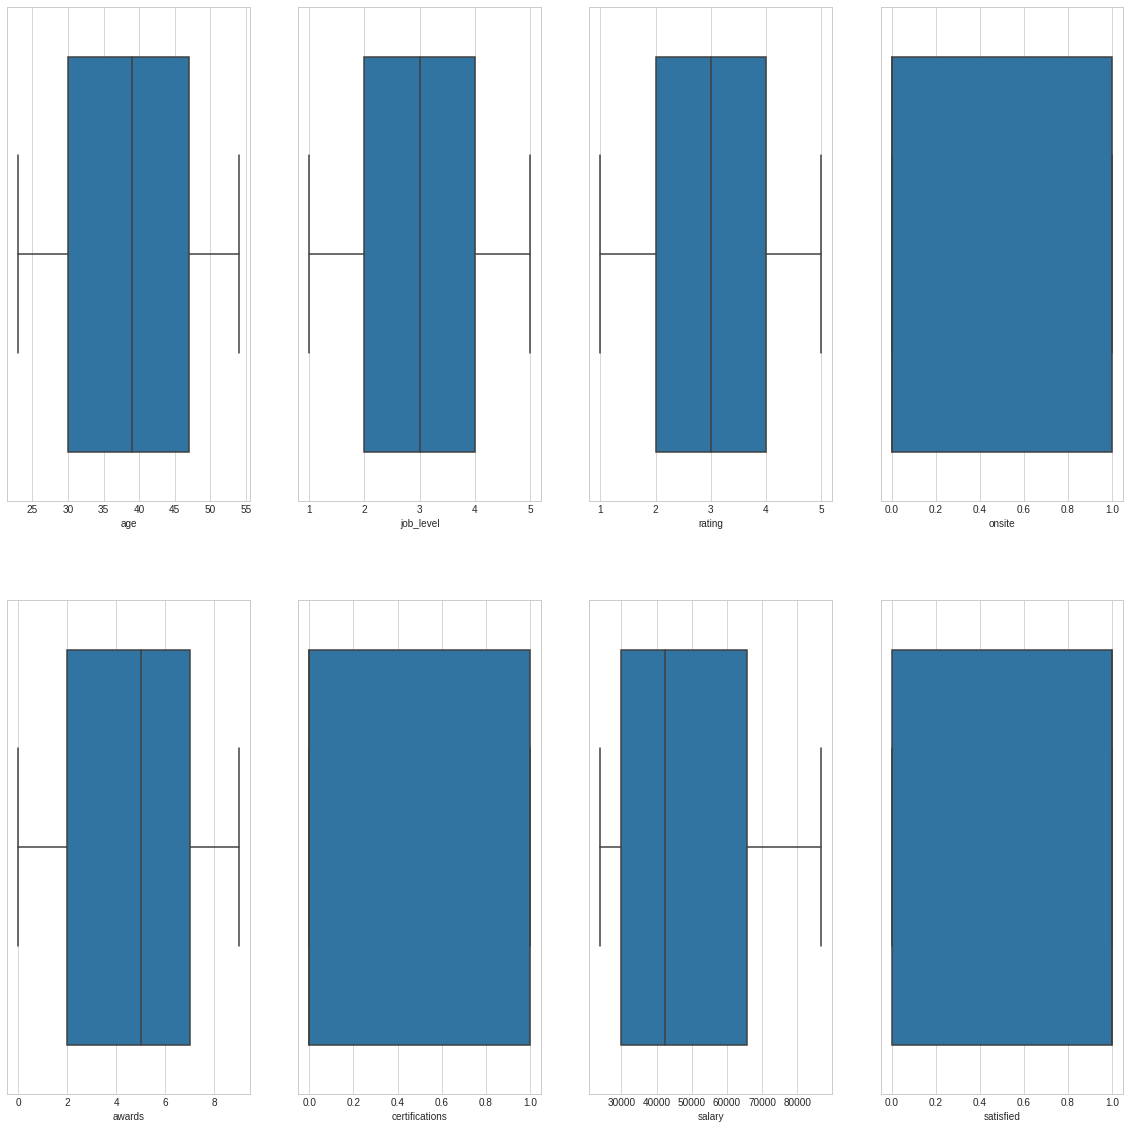

In [11]:
plt.figure(figsize = (20,20))

n = 1
for name in satis.describe().columns:
  plt.subplot(2,4,n)
  sns.boxplot(satis[name])
  n += 1

plt.style.use('seaborn-whitegrid')
plt.show()

# there are no outliers, so we move ahead to Exploratory Data Analysis

#6) Exploratory Data Analysis

In [12]:
satis.head()

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


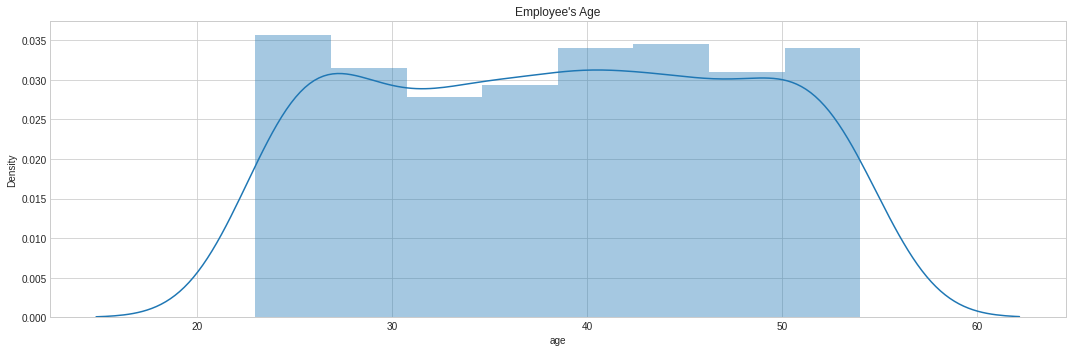

In [13]:
plt.figure(figsize = (15,5))

sns.distplot(satis['age'])
plt.title("Employee's Age")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

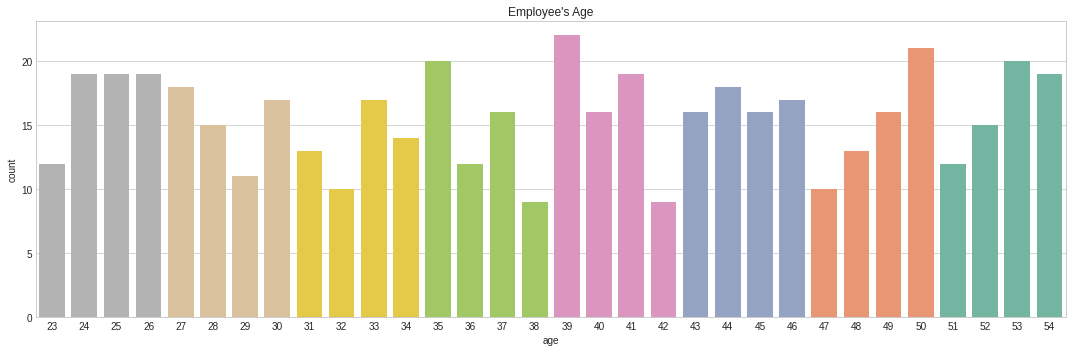

In [14]:
plt.figure(figsize = (15,5))

sns.countplot(satis['age'], palette = 'Set2_r')
plt.title("Employee's Age")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# Office are dominated by employee who 39, 50, 53, 35, and 54 years old.

In [15]:
satis.stb.freq(['age'], cum_cols = False)

,age,count,percent
0,39,22,4.4
1,50,21,4.2
2,53,20,4.0
3,35,20,4.0
4,54,19,3.8
5,41,19,3.8
6,26,19,3.8
7,25,19,3.8
8,24,19,3.8
9,44,18,3.6


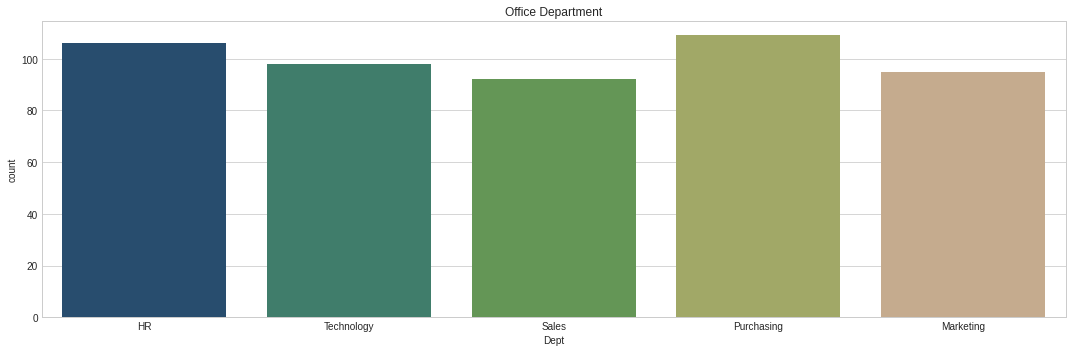

In [16]:
plt.figure(figsize = (15,5))

sns.countplot(satis['Dept'], palette = 'gist_earth')
plt.title("Office Department")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# Here, Office Departments:
  # Purchasing	21.8%
  # HR 21.2%
  # Technology	19.6%
  # Marketing	19.0%
  # Sales	18.4%

# Departments in this office kind of balance. Still, purchasing is the most in number.

In [17]:
satis.stb.freq(['Dept'], cum_cols = False)

,Dept,count,percent
0,Purchasing,109,21.8
1,HR,106,21.2
2,Technology,98,19.6
3,Marketing,95,19.0
4,Sales,92,18.4


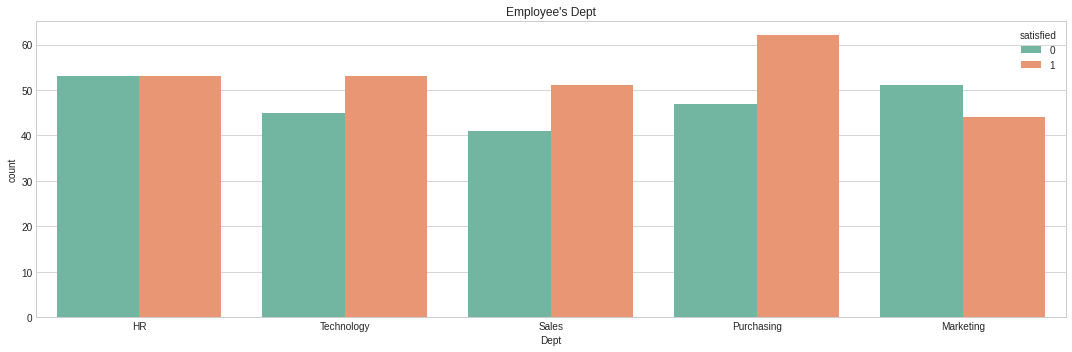

In [18]:
plt.figure(figsize = (15,5))

sns.countplot(satis['Dept'], hue = satis['satisfied'],palette = 'Set2')
plt.title("Employee's Dept")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# notice that only marketing department is dominated by unsatisfied employees

In [19]:
(pd.crosstab(index = satis['satisfied'],
            columns = satis['Dept'],
            normalize = 'columns')*100).round(2)

Dept,HR,Marketing,Purchasing,Sales,Technology
satisfied,,,,,
0,50.0,53.68,43.12,44.57,45.92
1,50.0,46.32,56.88,55.43,54.08


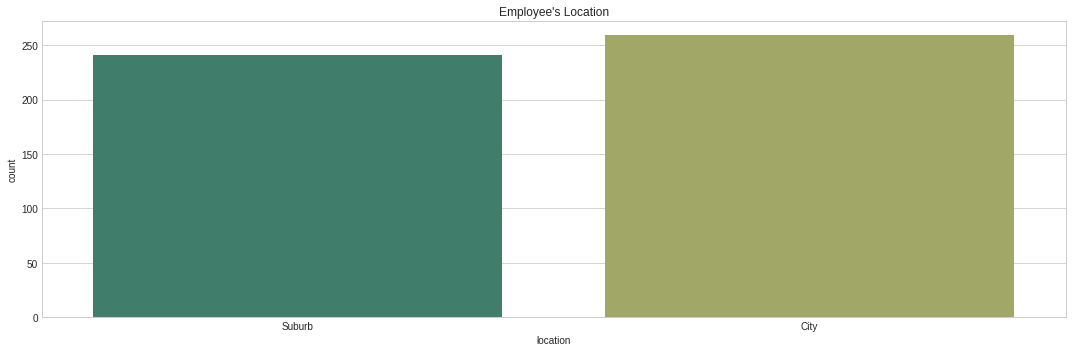

In [20]:
plt.figure(figsize = (15,5))

sns.countplot(satis['location'], palette = 'gist_earth')
plt.title("Employee's Location")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# 51.8% employees live in the city, while 48.2% employees live in suburb.

In [21]:
satis.stb.freq(['location'], cum_cols = False)

,location,count,percent
0,City,259,51.8
1,Suburb,241,48.2


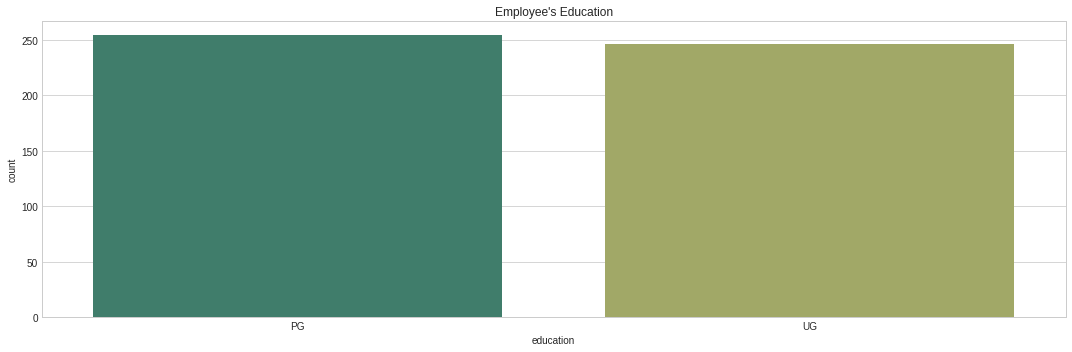

In [22]:
plt.figure(figsize = (15,5))

sns.countplot(satis['education'], palette = 'gist_earth')
plt.title("Employee's Education")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# 50.8% employees are postgraduate, while 40.2% employees are undergraduate
# employees in this office are well educated.

In [23]:
satis.stb.freq(['education'], cum_cols = False)

,education,count,percent
0,PG,254,50.8
1,UG,246,49.2


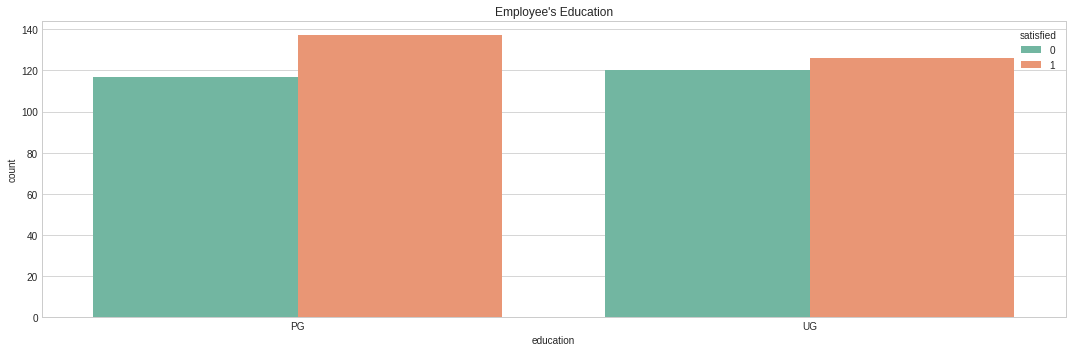

In [36]:
plt.figure(figsize = (15,5))

sns.countplot(satis['education'], hue = satis['satisfied'],palette = 'Set2')
plt.title("Employee's Education")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# Either PG or UG education level, they are still dominated by satisfied employees

In [37]:
(pd.crosstab(index = satis['satisfied'],
            columns = satis['education'],
            normalize = 'columns')*100).round(2)

education,PG,UG
satisfied,,
0,46.06,48.78
1,53.94,51.22


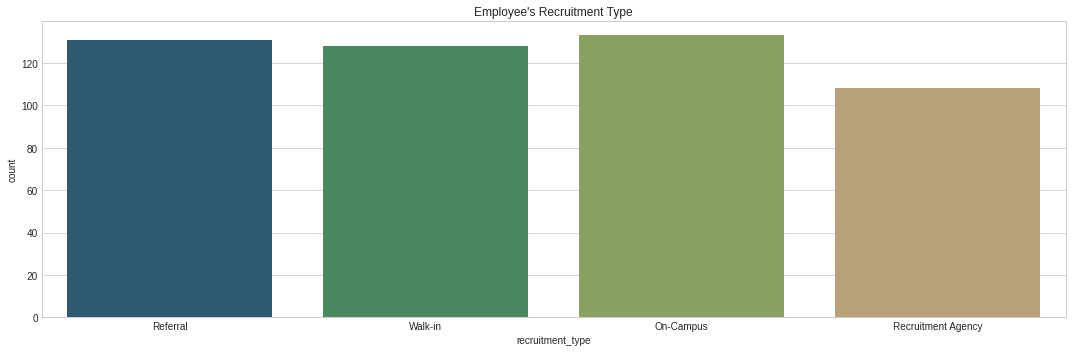

In [24]:
plt.figure(figsize = (15,5))

sns.countplot(satis['recruitment_type'], palette = 'gist_earth')
plt.title("Employee's Recruitment Type")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# this recruitment type seems well-balanced too.
# On-Campus recruitment is the most used to recruit with 133 employees,
# while recruiting with referral is the second one with 131 employees.

In [25]:
satis.stb.freq(['recruitment_type'], cum_cols = False)

,recruitment_type,count,percent
0,On-Campus,133,26.6
1,Referral,131,26.2
2,Walk-in,128,25.6
3,Recruitment Agency,108,21.6


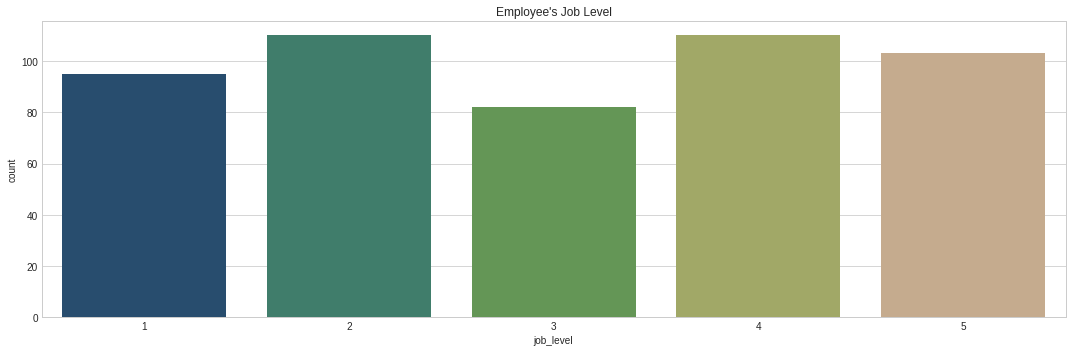

In [26]:
plt.figure(figsize = (15,5))

sns.countplot(satis['job_level'], palette = 'gist_earth')
plt.title("Employee's Job Level")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# The most job level in this office is level 2 and 4 with 22% each.

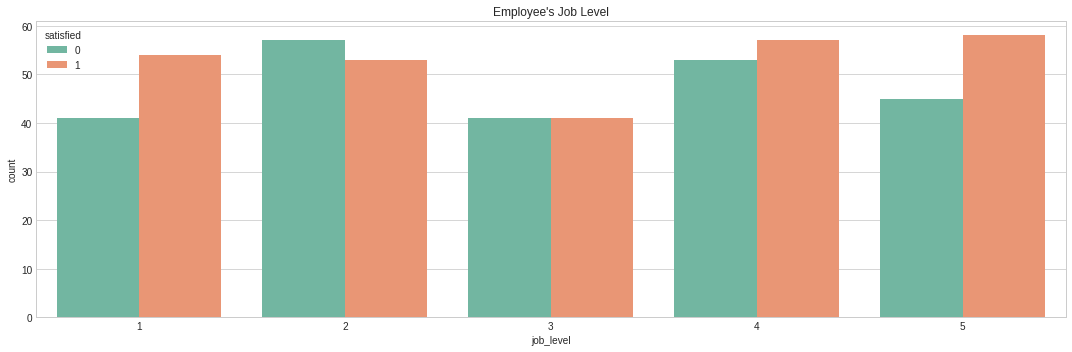

In [27]:
plt.figure(figsize = (15,5))

sns.countplot(satis['job_level'], hue = satis['satisfied'],palette = 'Set2')
plt.title("Employee's Job Level")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# notice that only 'job level 2' is dominated by unsatisfied employees while 'job level 3' is neutral.

In [28]:
(pd.crosstab(index = satis['satisfied'],
            columns = satis['job_level'],
            normalize = 'columns')*100).round(2)

job_level,1,2,3,4,5
satisfied,,,,,
0,43.16,51.82,50.0,48.18,43.69
1,56.84,48.18,50.0,51.82,56.31


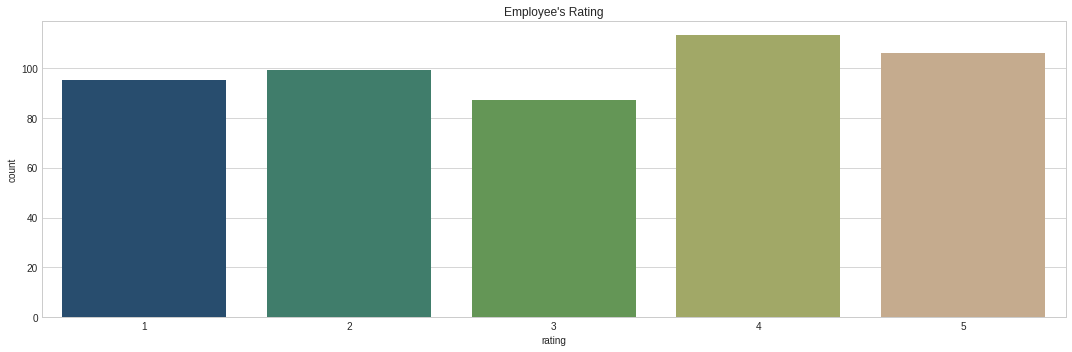

In [29]:
plt.figure(figsize = (15,5))

sns.countplot(satis['rating'], palette = 'gist_earth')
plt.title("Employee's Rating")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# most employees are rated by number 4 of 5 with 22.6%
# employees in here seems have pretty good performance overall in the previous year

In [30]:
satis.stb.freq(['rating'], cum_cols = False)

,rating,count,percent
0,4,113,22.6
1,5,106,21.2
2,2,99,19.8
3,1,95,19.0
4,3,87,17.4


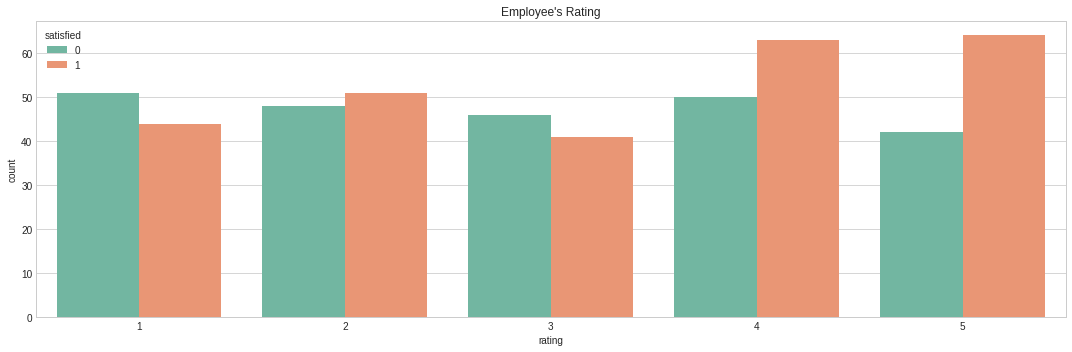

In [38]:
plt.figure(figsize = (15,5))

sns.countplot(satis['rating'], hue = satis['satisfied'],palette = 'Set2')
plt.title("Employee's Rating")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# it's obvious that employee who has rating 4 and 5 is way dominated by the satisfied employees
# while rating 1 and 2 are the most unsatisfied employees with above 50% employees.

In [39]:
(pd.crosstab(index = satis['satisfied'],
            columns = satis['rating'],
            normalize = 'columns')*100).round(2)

rating,1,2,3,4,5
satisfied,,,,,
0,53.68,48.48,52.87,44.25,39.62
1,46.32,51.52,47.13,55.75,60.38


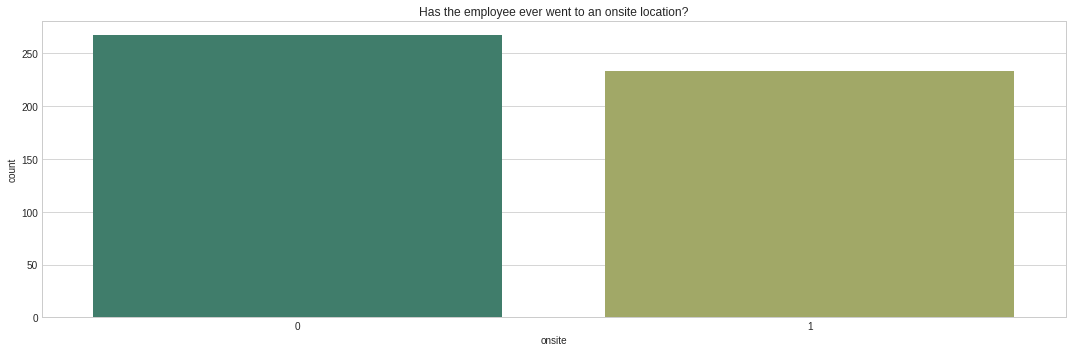

In [31]:
plt.figure(figsize = (15,5))

sns.countplot(satis['onsite'], palette = 'gist_earth')
plt.title("Has the employee ever went to an onsite location?")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# 53.4% employees have not went to an on site location
# 46.6% employees have went to an on site location

In [32]:
satis.stb.freq(['onsite'], cum_cols = False)

,onsite,count,percent
0,0,267,53.4
1,1,233,46.6


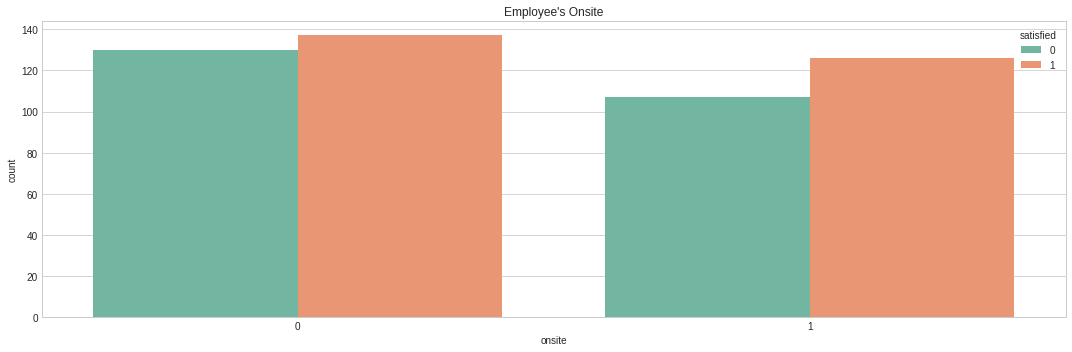

In [42]:
plt.figure(figsize = (15,5))

sns.countplot(satis['onsite'], hue = satis['satisfied'],palette = 'Set2')
plt.title("Employee's Onsite")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# Onsite doesn't affect employees satifaction

In [40]:
(pd.crosstab(index = satis['satisfied'],
            columns = satis['onsite'],
            normalize = 'columns')*100).round(2)

onsite,0,1
satisfied,,
0,48.69,45.92
1,51.31,54.08


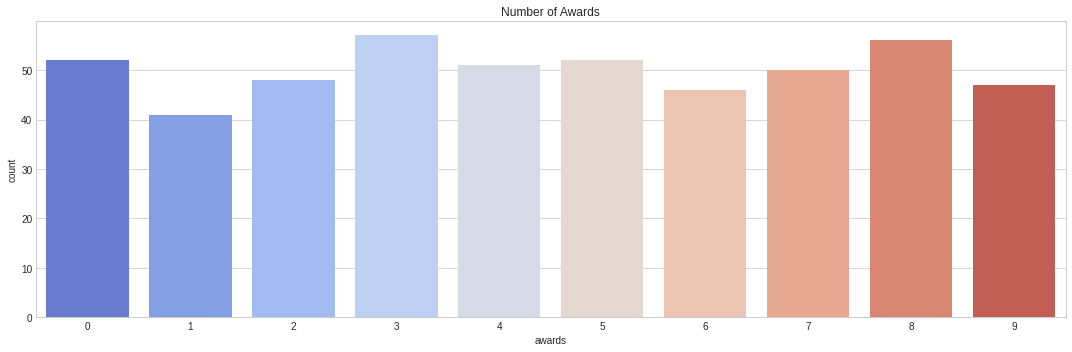

In [33]:
plt.figure(figsize = (15,5))

sns.countplot(satis['awards'], palette = 'coolwarm')
plt.title("Number of Awards")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# 10.4% employees are not awarded yet
# but the other 89.6% are ever get the rewards.
# Most employees have at 3 awards, but there's many employees who has 8 awards for themselves.

In [34]:
satis.stb.freq(['awards'], cum_cols = False)

,awards,count,percent
0,3,57,11.4
1,8,56,11.2
2,5,52,10.4
3,0,52,10.4
4,4,51,10.2
5,7,50,10.0
6,2,48,9.6
7,9,47,9.4
8,6,46,9.2
9,1,41,8.2


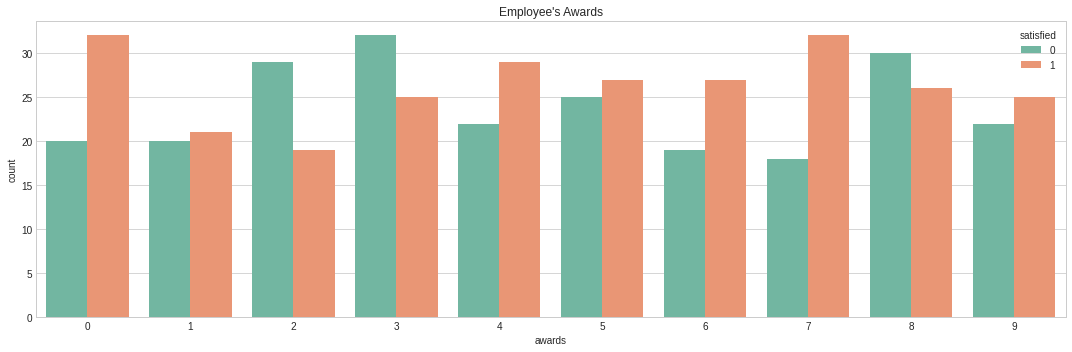

In [43]:
plt.figure(figsize = (15,5))

sns.countplot(satis['awards'], hue = satis['satisfied'],palette = 'Set2')
plt.title("Employee's Awards")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# Notice that employees who has 0 rewards tend to more satisfy than the other

In [44]:
(pd.crosstab(index = satis['satisfied'],
            columns = satis['awards'],
            normalize = 'columns')*100).round(2)

awards,0,1,2,3,4,5,6,7,8,9
satisfied,,,,,,,,,,
0,38.46,48.78,60.42,56.14,43.14,48.08,41.3,36.0,53.57,46.81
1,61.54,51.22,39.58,43.86,56.86,51.92,58.7,64.0,46.43,53.19


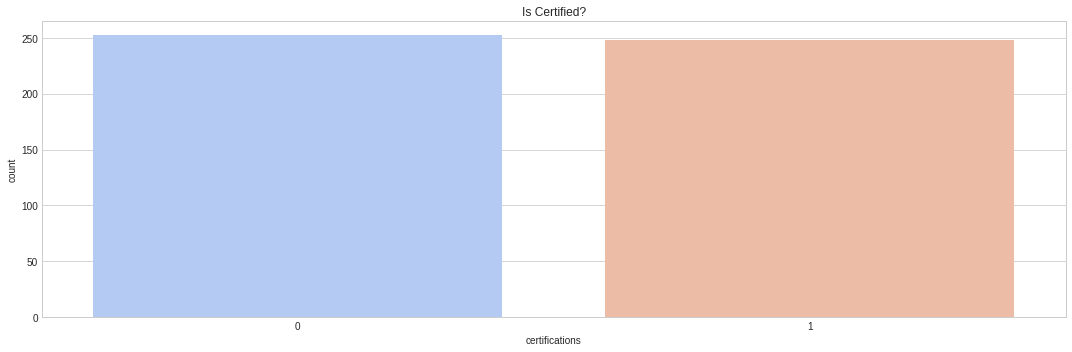

In [45]:
plt.figure(figsize = (15,5))

sns.countplot(satis['certifications'], palette = 'coolwarm')
plt.title("Is Certified?")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# 49.6% employees are already certified, while 50.4% employees are not certified yet.

In [46]:
satis.stb.freq(['certifications'], cum_cols = False)

,certifications,count,percent
0,0,252,50.4
1,1,248,49.6


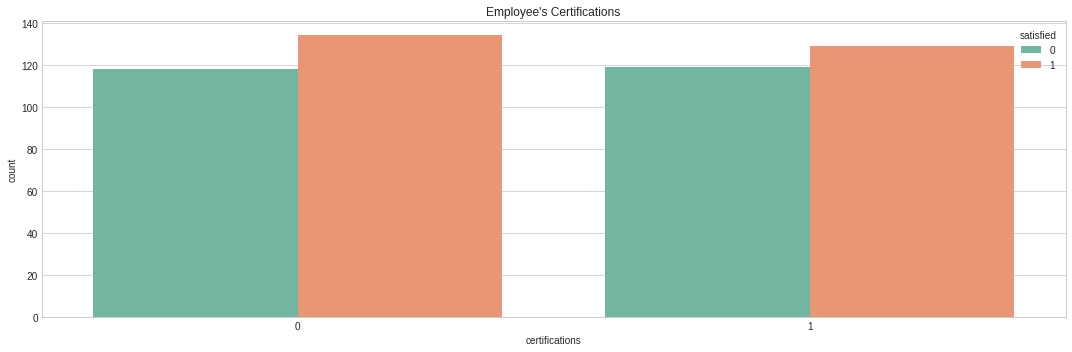

In [48]:
plt.figure(figsize = (15,5))

sns.countplot(satis['certifications'], hue = satis['satisfied'],palette = 'Set2')
plt.title("Employee's Certifications")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# certified or not doesn't affect employees satifaction

In [53]:
(pd.crosstab(index = satis['satisfied'],
            columns = satis['certifications'],
            normalize = 'columns')*100).round(2)

certifications,0,1
satisfied,,
0,46.83,47.98
1,53.17,52.02


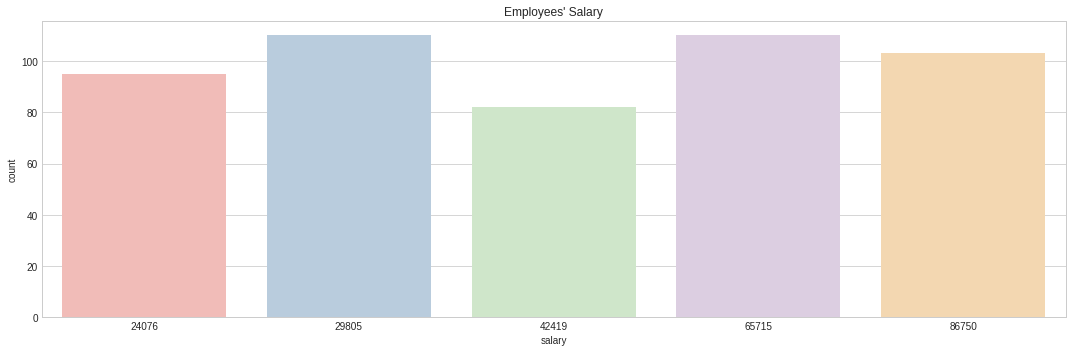

In [49]:
plt.figure(figsize = (15,5))

sns.countplot(satis['salary'], palette= 'Pastel1')
plt.title("Employees' Salary")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# most employees have their salary with $65,715, 22%
# with the same percentage, 22%, employees have $29,805 salary

In [50]:
satis.stb.freq(['salary'], cum_cols = False)

,salary,count,percent
0,65715,110,22.0
1,29805,110,22.0
2,86750,103,20.6
3,24076,95,19.0
4,42419,82,16.4


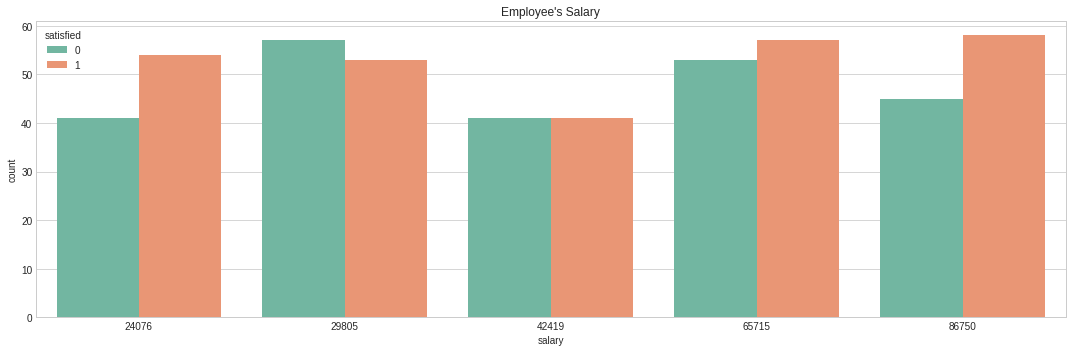

In [51]:
plt.figure(figsize = (15,5))

sns.countplot(satis['salary'], hue = satis['satisfied'],palette = 'Set2')
plt.title("Employee's Salary")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# Employees who have $86750 salary and $24076 have the same percentage of satisfaction: 56%

In [52]:
(pd.crosstab(index = satis['satisfied'],
            columns = satis['salary'],
            normalize = 'columns')*100).round(2)

salary,24076,29805,42419,65715,86750
satisfied,,,,,
0,43.16,51.82,50.0,48.18,43.69
1,56.84,48.18,50.0,51.82,56.31


# 8) Data Preprocessing

In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [55]:
satis.head()

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


## Label Encoding

In [56]:
satis['education'] = satis['education'].map({
                                            'PG' : 1,
                                            'UG' : 0})

# we have to make it ordinal because postgraduate has a better education rather than undergraduate.
# PG = 1, UG = 0

In [57]:
satis.head()

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,HR8270,28,HR,Suburb,1,Referral,5,2,0,1,0,86750,1
1,TECH1860,50,Technology,Suburb,1,Walk-in,3,5,1,2,1,42419,0
2,TECH6390,43,Technology,Suburb,0,Referral,4,1,0,2,0,65715,0
3,SAL6191,44,Sales,City,1,On-Campus,2,3,1,0,0,29805,1
4,HR6734,33,HR,City,0,Recruitment Agency,2,1,0,5,0,29805,1


## One Hot Encoding

In [58]:
satis = pd.get_dummies(satis, columns = ['Dept', 'location', 'recruitment_type'], drop_first = True)

# convert nominal categorical column into with one hot encoding methods.
# using drop_first = True to avoid dummy variable trap to reduce optimize machine learning computation
      # ref: https://www.algosome.com/articles/dummy-variable-trap-regression.html#:~:text=The%20Dummy%20Variable%20trap%20is,%2Ffemale)%20as%20an%20example.

In [59]:
satis.head()

,emp_id,age,education,job_level,rating,onsite,awards,certifications,salary,satisfied,Dept_Marketing,Dept_Purchasing,Dept_Sales,Dept_Technology,location_Suburb,recruitment_type_Recruitment Agency,recruitment_type_Referral,recruitment_type_Walk-in
0,HR8270,28,1,5,2,0,1,0,86750,1,0,0,0,0,1,0,1,0
1,TECH1860,50,1,3,5,1,2,1,42419,0,0,0,0,1,1,0,0,1
2,TECH6390,43,0,4,1,0,2,0,65715,0,0,0,0,1,1,0,1,0
3,SAL6191,44,1,2,3,1,0,0,29805,1,0,0,1,0,0,0,0,0
4,HR6734,33,0,2,1,0,5,0,29805,1,0,0,0,0,0,1,0,0


## Feature Selection

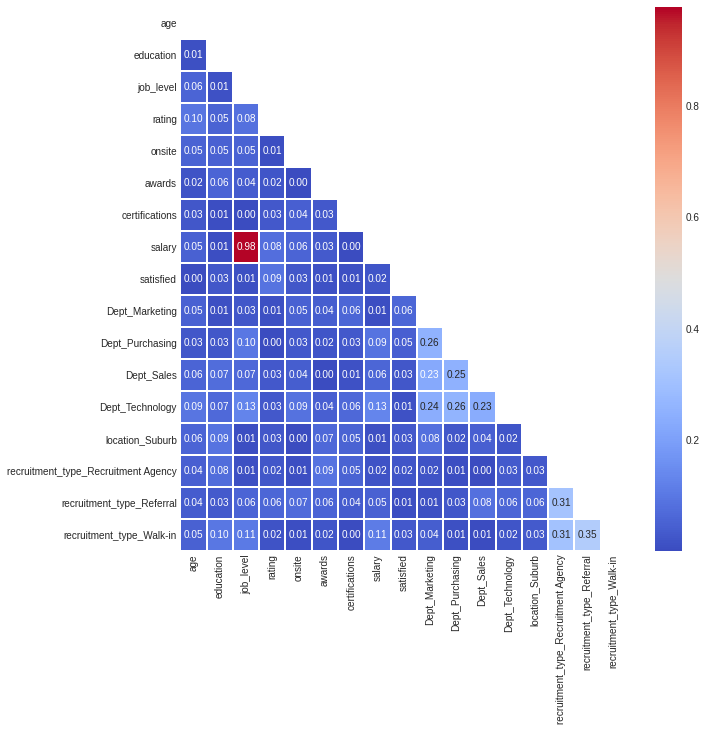

In [60]:
corr = satis.corr().abs()
mask = np.triu(np.ones_like(corr, dtype = bool))

plt.figure(figsize = (10,10))
sns.heatmap(corr, mask = mask, cmap = 'coolwarm', annot = True, linewidths = 1, fmt = '.2f')
plt.show()

# we see that correlation between salary and job_level is the highest correlation
# and we could see that each department job seems correlated each one another.

In [61]:
# since emp_id is just an unique id, we got to drop this column

satis.drop('emp_id', axis = 1, inplace = True)

In [62]:
satis.head()

,age,education,job_level,rating,onsite,awards,certifications,salary,satisfied,Dept_Marketing,Dept_Purchasing,Dept_Sales,Dept_Technology,location_Suburb,recruitment_type_Recruitment Agency,recruitment_type_Referral,recruitment_type_Walk-in
0,28,1,5,2,0,1,0,86750,1,0,0,0,0,1,0,1,0
1,50,1,3,5,1,2,1,42419,0,0,0,0,1,1,0,0,1
2,43,0,4,1,0,2,0,65715,0,0,0,0,1,1,0,1,0
3,44,1,2,3,1,0,0,29805,1,0,0,1,0,0,0,0,0
4,33,0,2,1,0,5,0,29805,1,0,0,0,0,0,1,0,0


In [79]:
satis_feat = satis[['age', 'education', 'job_level', 'rating', 'onsite',
       'certifications', 'salary', 'satisfied', 'Dept_Marketing',
       'Dept_Purchasing', 'Dept_Technology',
       'recruitment_type_Recruitment Agency', 'recruitment_type_Referral',
       'recruitment_type_Walk-in']]

# Selecting features based on Correlation and LogReg's Coefficient

In [80]:
X = satis_feat.drop(['satisfied'], axis = 1)
y = satis_feat['satisfied']

## Splitting Data

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

## Scaling the Features
We do scaling because there's a feature like `salary` has different ranges with other features.

In [82]:
scaler = RobustScaler()

In [83]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# 9) Machine Learning Modelling

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

## Logistic Regression

In [85]:
print(f"There are {len(X_train)} rows in X_train.")
print(f"There are {len(y_train)} rows in y_train")
print(f"There are {len(X_test)} rows in X_test.")
print(f"There are {len(y_test)} rows in y_test")

print(f"There are {len(X_train_sc)} rows in X_train_sc.")
print(f"There are {len(X_test_sc)} rows in X_test_sc")


There are 400 rows in X_train.
There are 400 rows in y_train
There are 100 rows in X_test.
There are 100 rows in y_test
There are 400 rows in X_train_sc.
There are 100 rows in X_test_sc


In [86]:
lr = LogisticRegression()

In [87]:
lr.fit(X_train_sc, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
pred_lr = lr.predict(X_test_sc)

In [89]:
# OVERFIT/UNDERFIT CHECK

fit_lr = pd.DataFrame(data = {
    "Training" : lr.score(X_train_sc, y_train),
    "Testing"  : lr.score(X_test_sc, y_test)
}, index = ['Logistic Regression'])

fit_lr

,Training,Testing
Logistic Regression,0.5775,0.5


In [90]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.47      0.47      0.47        47
           1       0.53      0.53      0.53        53

    accuracy                           0.50       100
   macro avg       0.50      0.50      0.50       100
weighted avg       0.50      0.50      0.50       100



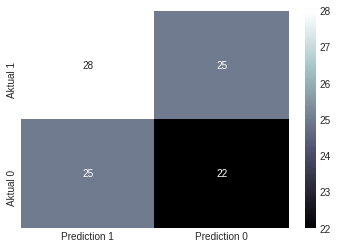

In [91]:
lr_cmx = confusion_matrix(y_test, pred_lr, labels = [1,0])
lr_cm = pd.DataFrame(data = lr_cmx,  columns = ['Prediction 1', 'Prediction 0'], index = ['Aktual 1', 'Aktual 0'])
sns.heatmap(lr_cm, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [92]:
tp_lr = lr_cm['Prediction 1'][0]
tn_lr = lr_cm['Prediction 0'][1]
fp_lr = lr_cm['Prediction 1'][1]
fn_lr = lr_cm['Prediction 0'][0]

lr_cm

,Prediction 1,Prediction 0
Aktual 1,28,25
Aktual 0,25,22


In [93]:
acc_logreg = accuracy_score(y_test, pred_lr)
# prec_logreg = precision_score(y_test, pred_lr)
# rec_logreg = recall_score(y_test, pred_lr)
# f1_logreg = f1_score(y_test, pred_lr)

In [94]:
lr.coef_[0].mean()

0.07399581347893064

In [95]:
# Finding Features that contribute little to a model

lr_coef = dict(zip(X.columns, abs(lr.coef_[0])))
pd.DataFrame.from_dict(data = lr_coef, orient = 'index', columns=['Coef']).sort_values(by = 'Coef', ascending = False)

,Coef
salary,0.586960
job_level,0.458778
rating,0.354013
Dept_Purchasing,0.301246
Dept_Marketing,0.175834
age,0.154477
onsite,0.121964
education,0.116044
recruitment_type_Recruitment Agency,0.110715
certifications,0.066427


## Random Forest

In [96]:
rf = RandomForestClassifier()

In [97]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [98]:
pred_rf = rf.predict(X_test)

In [99]:
# OVERFIT/UNDERFIT CHECK

fit_rf = pd.DataFrame(data = {
    "Training" : rf.score(X_train, y_train),
    "Testing"  : rf.score(X_test, y_test)
}, index = ['Random Forest'])

fit_rf


,Training,Testing
Random Forest,1.0,0.54


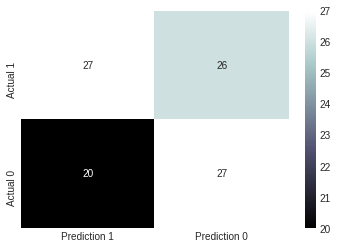

In [100]:
rf_cm = confusion_matrix(y_test, pred_rf, labels = [1,0])
rf_cm_df = pd.DataFrame(data = rf_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(rf_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [101]:
tp_rf = rf_cm_df['Prediction 1'][0]
tn_rf = rf_cm_df['Prediction 0'][1]
fp_rf = rf_cm_df['Prediction 1'][1]
fn_rf = rf_cm_df['Prediction 0'][0]

rf_cm_df


,Prediction 1,Prediction 0
Actual 1,27,26
Actual 0,20,27


In [102]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.51      0.57      0.54        47
           1       0.57      0.51      0.54        53

    accuracy                           0.54       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.54      0.54      0.54       100



In [103]:
acc_rf = accuracy_score(y_test, pred_rf)
# prec_rf = precision_score(y_test, pred_rf)
# rec_rf = recall_score(y_test, pred_rf)
# f1_rf = f1_score(y_test, pred_rf)

## Support Vector Machine

In [104]:
sv = SVC()

In [105]:
sv.fit(X_train_sc, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [106]:
pred_sv = sv.predict(X_test_sc)

In [107]:
# OVERFIT/UNDERFIT CHECK

fit_sv = pd.DataFrame(data = {
    "Training" : sv.score(X_train_sc, y_train),
    "Testing"  : sv.score(X_test_sc, y_test)
}, index = ['SVC'])

fit_sv


,Training,Testing
SVC,0.725,0.54


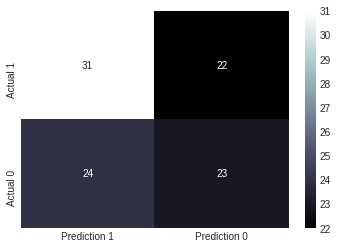

In [108]:
sv_cm = confusion_matrix(y_test, pred_sv, labels = [1,0])
sv_cm_df = pd.DataFrame(data = sv_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(sv_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [109]:
tp_sv = sv_cm_df['Prediction 1'][0]
tn_sv = sv_cm_df['Prediction 0'][1]
fp_sv = sv_cm_df['Prediction 1'][1]
fn_sv = sv_cm_df['Prediction 0'][0]

sv_cm_df

,Prediction 1,Prediction 0
Actual 1,31,22
Actual 0,24,23


In [110]:
print(classification_report(y_test, pred_sv))

              precision    recall  f1-score   support

           0       0.51      0.49      0.50        47
           1       0.56      0.58      0.57        53

    accuracy                           0.54       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.54      0.54      0.54       100



In [111]:
acc_sv = accuracy_score(y_test, pred_sv)
# prec_sv = precision_score(y_test, pred_sv)
# rec_sv= recall_score(y_test, pred_sv)
# f1_sv = f1_score(y_test, pred_sv)

# 10) Optimization

## Logistic Regression

In [112]:
lr_t = LogisticRegression()

param_lr = {
    "penalty": ['l1', 'l2', 'elasticnet', 'none'], 
    "C"      : np.logspace(-5,5,20),
    "max_iter" : [100, 500, 1000]
}

grid_lr = GridSearchCV(
    estimator = lr_t,
    param_grid = param_lr,
    cv = 10,
    scoring = 'accuracy',
    refit = True,
    n_jobs = -1,
    verbose = 1
)

In [113]:
grid_lr.fit(X_train_sc, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 720 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 2120 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:    4.0s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 3.35...
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
      

In [114]:
grid_lr.best_params_

{'C': 0.01438449888287663, 'max_iter': 100, 'penalty': 'l2'}

In [115]:
pred_lrt = grid_lr.predict(X_test_sc)

In [116]:
# OVERFIT/UNDERFIT CHECK

fit_lrt = pd.DataFrame(data = {
    "Training" : grid_lr.best_score_,
    "Testing"  : accuracy_score(y_test, pred_lrt)
}, index = ['Tuned Logistic Regression'])

fit_lrt

,Training,Testing
Tuned Logistic Regression,0.5275,0.46


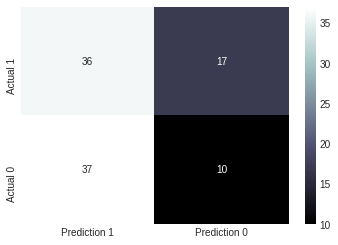

In [117]:
lrt_cm = confusion_matrix(y_test, pred_lrt, labels = [1,0])
lrt_cm_df = pd.DataFrame(data = lrt_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(lrt_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [118]:
lrt_cm_df


,Prediction 1,Prediction 0
Actual 1,36,17
Actual 0,37,10


In [119]:
tp_lrt = lrt_cm_df['Prediction 1'][0]
tn_lrt = lrt_cm_df['Prediction 0'][1]
fp_lrt = lrt_cm_df['Prediction 1'][1]
fn_lrt = lrt_cm_df['Prediction 0'][0]

In [120]:
print(classification_report(y_test, pred_lrt))


              precision    recall  f1-score   support

           0       0.37      0.21      0.27        47
           1       0.49      0.68      0.57        53

    accuracy                           0.46       100
   macro avg       0.43      0.45      0.42       100
weighted avg       0.44      0.46      0.43       100



## Random Forest

In [121]:
rf_t = RandomForestClassifier()

param_rf = {
    "n_estimators" : [10, 25, 50, 100, 500, 1000],
    # "max_depth" : [None,4,8, 10, 12],
    "min_samples_leaf" : np.linspace(0.01, 1.00, 10),
    "min_samples_split" : np.linspace(0.02, 2.00, 10)
}

grid_rf = GridSearchCV(
    estimator = rf_t,
    param_grid = param_rf,
    cv = 5,
    scoring = 'accuracy',
    refit = True,
    n_jobs = -1,
    verbose = 3
)

In [122]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 336 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 620 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 1688 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 2168 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 2712 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:   25.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [123]:
grid_rf.best_params_

{'min_samples_leaf': 0.01, 'min_samples_split': 0.02, 'n_estimators': 1000}

In [124]:
pred_rft = grid_rf.predict(X_test)

In [125]:
# OVERFIT/UNDERFIT CHECK

fit_rft = pd.DataFrame(data = {
    "Training" : grid_rf.best_score_,
    "Testing"  : accuracy_score(y_test, pred_rft)
}, index = ['Tuned Random Forest'])

fit_rft

,Training,Testing
Tuned Random Forest,0.55,0.5


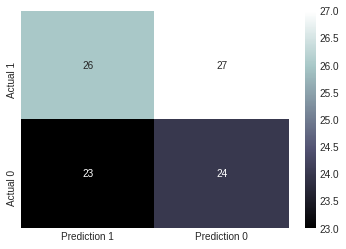

In [126]:
rft_cm = confusion_matrix(y_test, pred_rft, labels = [1,0])
rft_cm_df = pd.DataFrame(data = rft_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(rft_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [127]:
rft_cm_df


,Prediction 1,Prediction 0
Actual 1,26,27
Actual 0,23,24


In [128]:
tp_rft = rft_cm_df['Prediction 1'][0]
tn_rft = rft_cm_df['Prediction 0'][1]
fp_rft = rft_cm_df['Prediction 1'][1]
fn_rft = rft_cm_df['Prediction 0'][0]

In [129]:
print(classification_report(y_test, pred_rft))


              precision    recall  f1-score   support

           0       0.47      0.51      0.49        47
           1       0.53      0.49      0.51        53

    accuracy                           0.50       100
   macro avg       0.50      0.50      0.50       100
weighted avg       0.50      0.50      0.50       100



## Support Vector Machine

In [130]:
sv_t = SVC()

param_sv = {
    "C" : np.logspace(-4,4,15),
    "gamma" : ['scale', 'auto'],
    "max_iter" : np.arange(1000,5001, 500),
}

grid_sv = GridSearchCV(
    estimator = sv_t,
    param_grid = param_sv,
    cv = 10,
    scoring = 'accuracy',
    refit = True,
    n_jobs = -1,
    verbose = 3
)

In [131]:
grid_sv.fit(X_train_sc, y_train)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 432 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1328 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2480 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 2621 out of 2700 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:    3.0s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 3.72759372e-04, 1...03,
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00,
       3.72759372e+00, 1.38949549e+01, 5.17947468e+01, 1.93069773e+02,
       7.19685673e+02, 2.68269580e+03, 1.00000000e+04]),
                         'gamma': ['scale', 'auto'],
                         'max_iter': array([1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scori

In [132]:
grid_sv.best_params_

{'C': 193.06977288832496, 'gamma': 'auto', 'max_iter': 1500}

In [133]:
pred_svt = grid_sv.predict(X_test_sc)

In [134]:
# OVERFIT/UNDERFIT CHECK

fit_svt = pd.DataFrame(data = {
    "Training" : grid_sv.best_score_,
    "Testing"  : accuracy_score(y_test, pred_svt)
}, index = ['Tuned SVC'])

fit_svt

,Training,Testing
Tuned SVC,0.5625,0.59


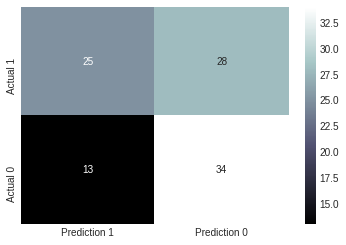

In [135]:
svt_cm = confusion_matrix(y_test, pred_svt, labels = [1,0])
svt_cm_df = pd.DataFrame(data = svt_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(svt_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [136]:
svt_cm_df


,Prediction 1,Prediction 0
Actual 1,25,28
Actual 0,13,34


In [137]:
tp_svt = svt_cm_df['Prediction 1'][0]
tn_svt = svt_cm_df['Prediction 0'][1]
fp_svt = svt_cm_df['Prediction 1'][1]
fn_svt = svt_cm_df['Prediction 0'][0]

In [138]:
print(classification_report(y_test, pred_svt))


              precision    recall  f1-score   support

           0       0.55      0.72      0.62        47
           1       0.66      0.47      0.55        53

    accuracy                           0.59       100
   macro avg       0.60      0.60      0.59       100
weighted avg       0.61      0.59      0.58       100



## Summary

In [139]:
model_summary = pd.concat([fit_lr, fit_rf, fit_sv,
                           fit_lrt,fit_rft, fit_svt])
model_summary

,Training,Testing
Logistic Regression,0.5775,0.50
Random Forest,1.0000,0.54
SVC,0.7250,0.54
Tuned Logistic Regression,0.5275,0.46
Tuned Random Forest,0.5500,0.50
Tuned SVC,0.5625,0.59


In [140]:
summary_cm = pd.DataFrame({
    "TruePositive" : [tp_lr, tp_sv, tp_rf, tp_lrt, tp_svt, tp_rft],
    "TrueNegative" : [tn_lr, tn_sv, tp_rf, tn_lrt, tn_svt, tn_rft],
    "FalsePositive": [fp_lr, fp_sv, fp_rf, fp_lrt, fp_svt, fp_rft],
    "FalseNegative": [fn_lr, fn_sv, fn_rf, fn_lrt, fn_svt, fn_rft]
}, 
index = model_summary.index)

summary_cm

,TruePositive,TrueNegative,FalsePositive,FalseNegative
Logistic Regression,28,22,25,25
Random Forest,31,23,24,22
SVC,27,27,20,26
Tuned Logistic Regression,36,10,37,17
Tuned Random Forest,25,34,13,28
Tuned SVC,26,24,23,27


## Choosing the Model

In [141]:
from sklearn.externals import joblib

In [142]:
joblib.dump(grid_sv, 'ModelSVC')

# we choose this model since it has the best accuracy compares to other model.
# and this model doesn't so overfitting.
# Tuned SVC predicts great with 26 TP and 24 TN, while the model still has error with 23 FP and 27 FN.

['ModelSVC']

# 11) Conclusion
1. Only Marketing department which dominated by unsatisfied employees.
2. Either PG or UG education level, they are still dominated by satisfied employees.
3. Only 'job level 2' is dominated by unsatisfied employees while 'job level 3' is neutral.
4. It's obvious that employee who has rating 4 and 5 is way dominated by the satisfied employees, while rating 1 and 2 are the most unsatisfied employees with above 50% employees.
5. Onsite doesn't affect employees satifaction.
6. Employees who has 0 rewards tend to more satisfy than the other.
7. Certified or not doesn't affect employees satifaction.
8. Employees who have \$86750 of their salary and \$24076 have the same percentage of satisfaction: 56%. We can strongly say that in this case, salary doesn't affect the employee's satisfaction.
9. The best Machine Learning Model with Support Vector Machine (Classifier) algorithm could predict employee's satisfaction within 0.59 of 1.0 accuracy.



#12) Recommendation
1. Companies should pay more attention to their employees who work in the Marketing department, especially those with level 2 jobs.
2. Ratings given by the company affect employee satisfaction, therefore companies can add intrapersonal aspects as a rating indicator. So it is not only technical performance that is assessed.
3. Award is very good given but if you want to balance employee satisfaction with performance, it is better if the award is given periodically. This can create social jealousy that affects employee satisfaction.
4. It's not about money and awards, but must be checked again on the work environment and rating indicators.
5. Since the Machine Learning model got 0.59, we consider that employees dataset should be more reliable. For example, the `salary` feature. The salary feature should not be fixed like categorical and you have to be frankly about the whole data.

In [ ]:
|